In [66]:
#########################################################################################
#########################################################################################
#########################################################################################


#Script by Maria J. Molina
#National Center for Atmospheric Research


from netCDF4 import Dataset
from wrf import getvar, get_basemap
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
import numpy as np
import geopandas as gpd
import shapely
from descartes import PolygonPatch
import pandas as pd
from datetime import timedelta
import matplotlib.patheffects as path_effects


#########################################################################################
#########################################################################################
#########################################################################################

In [9]:
Tors = pd.read_csv(r'/glade/work/molina/DATA/jan2017_synoptic/1950-2018_actual_tornadoes.csv',error_bad_lines=False,
                   parse_dates=[['mo','dy','yr','time']])

Tors = Tors.assign(UTC_time = Tors['mo_dy_yr_time'] + timedelta(hours=6))       
Tors = Tors.assign(UTC_yr = Tors['UTC_time'].dt.year) 
Tors = Tors.assign(UTC_dy = Tors['UTC_time'].dt.day) 
Tors = Tors.assign(UTC_mo = Tors['UTC_time'].dt.month) 
Tors = Tors.assign(UTC_hr = Tors['UTC_time'].dt.hour) 

Tors = Tors[(Tors['UTC_mo']==1)]
Tors = Tors[(Tors['UTC_yr']==2017)]
Tors = Tors[(Tors['UTC_dy']>=21)&(Tors['UTC_dy']<=23)]

Tors = Tors[Tors['slat']!=0]
Tors = Tors[Tors['slon']!=0]
Tors = Tors[Tors['slat']>=20]
Tors = Tors[Tors['slat']<=50]
Tors = Tors[Tors['slon']>=-130]
Tors = Tors[Tors['slon']<=-65]

Tors1 = Tors[(Tors['UTC_dy']==21)&(Tors['UTC_hr']<=21)]
Tors2 = Tors[(Tors['UTC_dy']==21)&(Tors['UTC_hr']>21)|(Tors['UTC_dy']==22)&(Tors['UTC_hr']<4)]
Tors3 = Tors[(Tors['UTC_dy']==22)&(Tors['UTC_hr']>=4)]
Tors4 = Tors[(Tors['UTC_dy']==23)]

Tors1_fat = Tors1['fat'].values.sum()
Tors2_fat = Tors2['fat'].values.sum()
Tors3_fat = Tors3['fat'].values.sum()
Tors4_fat = Tors4['fat'].values.sum()

Tors1_inj = Tors1['inj'].values.sum()
Tors2_inj = Tors2['inj'].values.sum()
Tors3_inj = Tors3['inj'].values.sum()
Tors4_inj = Tors4['inj'].values.sum()

Tors1_EF0 = Tors1[(Tors1['mag']==0)]
Tors1_EF1 = Tors1[(Tors1['mag']==1)]
Tors1_EF2 = Tors1[(Tors1['mag']==2)]
Tors1_EF3 = Tors1[(Tors1['mag']==3)]
Tors1_EF4 = Tors1[(Tors1['mag']==4)]
Tors1_EF5 = Tors1[(Tors1['mag']==5)]

Tors2_EF0 = Tors2[(Tors2['mag']==0)]
Tors2_EF1 = Tors2[(Tors2['mag']==1)]
Tors2_EF2 = Tors2[(Tors2['mag']==2)]
Tors2_EF3 = Tors2[(Tors2['mag']==3)]
Tors2_EF4 = Tors2[(Tors2['mag']==4)]
Tors2_EF5 = Tors2[(Tors2['mag']==5)]

Tors3_EF0 = Tors3[(Tors3['mag']==0)]
Tors3_EF1 = Tors3[(Tors3['mag']==1)]
Tors3_EF2 = Tors3[(Tors3['mag']==2)]
Tors3_EF3 = Tors3[(Tors3['mag']==3)]
Tors3_EF4 = Tors3[(Tors3['mag']==4)]
Tors3_EF5 = Tors3[(Tors3['mag']==5)]

Tors4_EF0 = Tors4[(Tors4['mag']==0)]
Tors4_EF1 = Tors4[(Tors4['mag']==1)]
Tors4_EF2 = Tors4[(Tors4['mag']==2)]
Tors4_EF3 = Tors4[(Tors4['mag']==3)]
Tors4_EF4 = Tors4[(Tors4['mag']==4)]
Tors4_EF5 = Tors4[(Tors4['mag']==5)]

In [23]:
print(len(Tors1_EF0),len(Tors1_EF1),len(Tors1_EF2),len(Tors1_EF3),len(Tors1_EF4),len(Tors1_EF5))
print(len(Tors2_EF0),len(Tors2_EF1),len(Tors2_EF2),len(Tors2_EF3),len(Tors2_EF4),len(Tors2_EF5))
print(len(Tors3_EF0),len(Tors3_EF1),len(Tors3_EF2),len(Tors3_EF3),len(Tors3_EF4),len(Tors3_EF5))
print(len(Tors4_EF0),len(Tors4_EF1),len(Tors4_EF2),len(Tors4_EF3),len(Tors4_EF4),len(Tors4_EF5))

17 22 4 1 0 0
5 5 4 0 0 0
3 14 3 2 0 0
0 3 0 0 0 0


In [10]:
Tors1_inj

62

In [3]:
ncfile2_wrf_d02 = Dataset('/glade/scratch/molina/WAF_proj/WAF2019/wrf4km_ens_1/wrfout_d01_2017-01-15_09:00:00')

while True:
    dbz2_wrf_d02 = np.array([0])
    if len(dbz2_wrf_d02) == 1:
        try: 
            dbz2_wrf_d02 = getvar(ncfile2_wrf_d02, "dbz")
        except ValueError:
            continue
    if len(dbz2_wrf_d02) != 1:
        print('File Opened...')
        break

bm = get_basemap(dbz2_wrf_d02)

File Opened...


In [4]:
can = gpd.GeoDataFrame.from_file("/glade/work/molina/DATA/ocean_shapefiles/World_Seas_WGS84.shp")

gom   = can[can['NAME']=='Gulf of Mexico']
carib = can[can['NAME']=='Caribbean Sea']
natl  = can[can['NAME']=='North Atlantic Ocean']
npac  = can[can['NAME']=='North Pacific Ocean']

In [5]:
studyarea = shapely.geometry.box(bm.llcrnrlon, bm.llcrnrlat, 
                                 bm.urcrnrlon, bm.urcrnrlat)

patches_1 = []
selection = gom[gom.geometry.intersects(studyarea)]
for poly in selection.geometry:
    if poly.geom_type == 'Polygon':
        mpoly = shapely.ops.transform(bm, poly)
        patches_1.append(PolygonPatch(mpoly))
    elif poly.geom_type == 'MultiPolygon':
        for subpoly in poly:
            mpoly = shapely.ops.transform(bm, poly)
            patches_1.append(PolygonPatch(mpoly))
    else:
        print(poly, ' is neither a polygon nor a multi-polygon. Skipping it.')
              
patches_2 = []
selection = carib[carib.geometry.intersects(studyarea)]
for poly in selection.geometry:
    if poly.geom_type == 'Polygon':
        mpoly = shapely.ops.transform(bm, poly)
        patches_2.append(PolygonPatch(mpoly))
    elif poly.geom_type == 'MultiPolygon':
        for subpoly in poly:
            mpoly = shapely.ops.transform(bm, poly)
            patches_2.append(PolygonPatch(mpoly))
    else:
        print(poly, ' is neither a polygon nor a multi-polygon. Skipping it.')

patches_3 = []
selection = natl[natl.geometry.intersects(studyarea)]
for poly in selection.geometry:
    if poly.geom_type == 'Polygon':
        mpoly = shapely.ops.transform(bm, poly)
        patches_3.append(PolygonPatch(mpoly))
    elif poly.geom_type == 'MultiPolygon':
        for subpoly in poly:
            mpoly = shapely.ops.transform(bm, poly)
            patches_3.append(PolygonPatch(mpoly))
    else:
        print(poly, ' is neither a polygon nor a multi-polygon. Skipping it.')
        
patches_4 = []
selection = npac[npac.geometry.intersects(studyarea)]
for poly in selection.geometry:
    if poly.geom_type == 'Polygon':
        mpoly = shapely.ops.transform(bm, poly)
        patches_4.append(PolygonPatch(mpoly))
    elif poly.geom_type == 'MultiPolygon':
        for subpoly in poly:
            mpoly = shapely.ops.transform(bm, poly)
            patches_4.append(PolygonPatch(mpoly))
    else:
        print(poly, ' is neither a polygon nor a multi-polygon. Skipping it.')

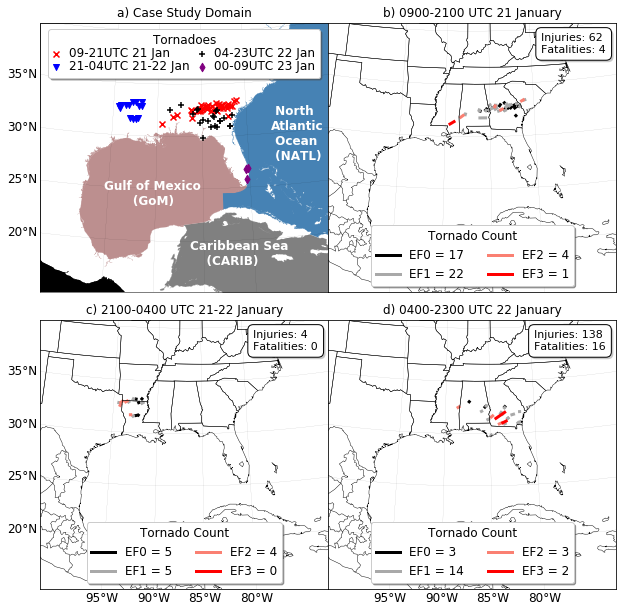

In [94]:
#########################################################################################
#########################################################################################
#########################################################################################


fig = plt.figure(figsize=(8,8.25))

ax = fig.add_axes([0.0, 0.5, 0.5, 0.5])

bm = get_basemap(dbz2_wrf_d02)

bm.drawmapboundary(linewidth=0.5, fill_color='none', zorder=4)

ax.add_collection(PatchCollection(patches_1, facecolor= 'rosybrown', edgecolor='rosybrown', linewidths=0.1, zorder=3))
ax.add_collection(PatchCollection(patches_2, facecolor= 'grey', edgecolor='grey', linewidths=0.1, zorder=2))
ax.add_collection(PatchCollection(patches_3, facecolor= 'steelblue', edgecolor='steelblue', linewidths=0.1, zorder=2))
ax.add_collection(PatchCollection(patches_4, facecolor= 'k', edgecolor='k', linewidths=0.1, zorder=2))

ax.set_title('a) Case Study Domain', fontsize=12)

ax.text(0.8, 0.49, u' North\nAtlantic\n Ocean\n (NATL)', fontsize=12, alpha=1, color='w', fontweight='bold', zorder=106, transform=ax.transAxes)
ax.text(0.2225, 0.325, u'Gulf of Mexico\n       (GoM)', fontsize=12, alpha=1, color='w', fontweight='bold', zorder=106, transform=ax.transAxes)
ax.text(0.52, 0.1, u'Caribbean Sea\n    (CARIB)', fontsize=12, alpha=1, color='w', fontweight='bold', zorder=106, transform=ax.transAxes) 

for y, x in zip(Tors1['slat'].values, Tors1['slon'].values):
    xm, ym = bm(x, y)
    t1 = ax.scatter(xm, ym, c='red', marker='x', zorder=100)
for y, x in zip(Tors2['slat'].values, Tors2['slon'].values):
    xm, ym = bm(x, y)
    t2 = ax.scatter(xm, ym, c='b', marker="v", zorder=100)
for y, x in zip(Tors3['slat'].values, Tors3['slon'].values):
    xm, ym = bm(x, y)
    t3 = ax.scatter(xm, ym, c='k', marker='+', zorder=100)
for y, x in zip(Tors4['slat'].values, Tors4['slon'].values):
    xm, ym = bm(x, y)
    t4 = ax.scatter(xm, ym, c='purple', marker='d', zorder=100)

leg = ax.legend([t1,t2,t3,t4],
          [u"09-21UTC 21 Jan",
           u"21-04UTC 21-22 Jan",
           u"04-23UTC 22 Jan",
           u"00-09UTC 23 Jan"],
          loc="upper center", 
                handlelength=0.5,
                columnspacing=0.75,
                #handletextpad=0.0, 
                labelspacing=0.01, 
                #borderpad=0.25,
                ncol=2,
            title="Tornadoes",
          fancybox=True, shadow=True, framealpha=1., fontsize=12)

leg.set_zorder(102)
leg.get_title().set_fontsize('12')

bm.drawmeridians(np.arange(int(-95),int(-79),5), labels=[0,0,0,0], linewidth=0.1, fontsize=12, zorder=20)
bm.drawparallels(np.arange(int(20),int(50),5), labels=[1,0,0,0], linewidth=0.1, fontsize=12, zorder=20)


#########################################################################################
#########################################################################################
#########################################################################################


ax5 = fig.add_axes([0.5, 0.5, 0.5, 0.5])

bm = get_basemap(dbz2_wrf_d02)

tracks = Tors1

for i in range(0,len(tracks)):

    if tracks['mag'].values[i] == 0:
        y1=tracks['slat'].values[i]
        x1=tracks['slon'].values[i]+360
        x2=tracks['elon'].values[i]+360
        if tracks['elon'].values[i]==0.0:
            x2=x1
        y2=tracks['elat'].values[i]
        if tracks['elat'].values[i]==0.0:
            y2=y1     
        latsT = []
        lonsT = []
        latsT.append(y1)
        lonsT.append(x1)
        latsT.append(y2)
        lonsT.append(x2)
        X1,Y1 = bm(lonsT, latsT)
        p0, = ax5.plot(X1, Y1, linewidth=3.,color='k',alpha=1.,zorder=1)
    if tracks['mag'].values[i] == 1:
        y1=tracks['slat'].values[i]
        x1=tracks['slon'].values[i]+360
        x2=tracks['elon'].values[i]+360
        if tracks['elon'].values[i]==0.0:
            x2=x1
        y2=tracks['elat'].values[i]
        if tracks['elat'].values[i]==0.0:
            y2=y1     
        latsT = []
        lonsT = []
        latsT.append(y1)
        lonsT.append(x1)
        latsT.append(y2)
        lonsT.append(x2)
        X1,Y1 = bm(lonsT, latsT)
        p1, = ax5.plot(X1, Y1, linewidth=3.,color='darkgrey',alpha=1.,zorder=2)
    if tracks['mag'].values[i] == 2:
        y1=tracks['slat'].values[i]
        x1=tracks['slon'].values[i]+360
        x2=tracks['elon'].values[i]+360
        if tracks['elon'].values[i]==0.0:
            x2=x1
        y2=tracks['elat'].values[i]
        if tracks['elat'].values[i]==0.0:
            y2=y1     
        latsT = []
        lonsT = []
        latsT.append(y1)
        lonsT.append(x1)
        latsT.append(y2)
        lonsT.append(x2)
        X1,Y1 = bm(lonsT, latsT)
        p22, = ax5.plot(X1, Y1, linewidth=3.,color='salmon',alpha=1.,zorder=3)
    if tracks['mag'].values[i] == 3:
        y1=tracks['slat'].values[i]
        x1=tracks['slon'].values[i]+360
        x2=tracks['elon'].values[i]+360
        if tracks['elon'].values[i]==0.0:
            x2=x1
        y2=tracks['elat'].values[i]
        if tracks['elat'].values[i]==0.0:
            y2=y1     
        latsT = []
        lonsT = []
        latsT.append(y1)
        lonsT.append(x1)
        latsT.append(y2)
        lonsT.append(x2)
        X1,Y1 = bm(lonsT, latsT)
        p3, = ax5.plot(X1, Y1, linewidth=3.,color='red',alpha=1.,zorder=4)

bm.drawcoastlines(linewidth=0.45, zorder=4)
bm.drawcountries(linewidth=0.45, zorder=4)
bm.drawstates(linewidth=0.45, zorder=4)


legend = ax5.legend([p0,p1,p22,p3,],
                    ["EF0 = "+str(int(len(Tors1_EF0))),
                     "EF1 = "+str(int(len(Tors1_EF1))),
                     "EF2 = "+str(int(len(Tors1_EF2))),
                     "EF3 = "+str(int(len(Tors1_EF3)))],
                    loc="lower center", shadow=True, 
                    title="Tornado Count",
                    fancybox=True, ncol=2, fontsize=12)

legend.get_title().set_fontsize('12')
legend.set_zorder(102)

bm.drawmeridians(np.arange(int(-95),int(-79),5), labels=[0,0,0,0], linewidth=0.1, fontsize=12, zorder=20)
bm.drawparallels(np.arange(int(20),int(50),5), labels=[0,0,0,0], linewidth=0.1, fontsize=12, zorder=20)

ax5.set_title('b) 0900-2100 UTC 21 January', fontsize=12)

ax5.text(0.74, 0.89, u'Injuries: '+str(Tors1_inj)+'\nFatalities: '+str(Tors1_fat), fontsize=11, alpha=1., 
         color='k', zorder=106, transform=ax5.transAxes,
         bbox=dict(facecolor='w', edgecolor='k', alpha=1., linewidth=1., 
                   boxstyle='round', pad=0.5, 
                   path_effects=[path_effects.SimplePatchShadow(),path_effects.Normal()]))


#########################################################################################
#########################################################################################
#########################################################################################


ax3 = fig.add_axes([0.0, 0., 0.5, 0.5])

bm = get_basemap(dbz2_wrf_d02)

tracks = Tors2

for i in range(0,len(tracks)):

    if tracks['mag'].values[i] == 0:
        y1=tracks['slat'].values[i]
        x1=tracks['slon'].values[i]+360
        x2=tracks['elon'].values[i]+360
        if tracks['elon'].values[i]==0.0:
            x2=x1
        y2=tracks['elat'].values[i]
        if tracks['elat'].values[i]==0.0:
            y2=y1     
        latsT = []
        lonsT = []
        latsT.append(y1)
        lonsT.append(x1)
        latsT.append(y2)
        lonsT.append(x2)
        X1,Y1 = bm(lonsT, latsT)
        p0, = ax3.plot(X1, Y1, linewidth=3.,color='k',alpha=1.,zorder=1)
    if tracks['mag'].values[i] == 1:
        y1=tracks['slat'].values[i]
        x1=tracks['slon'].values[i]+360
        x2=tracks['elon'].values[i]+360
        if tracks['elon'].values[i]==0.0:
            x2=x1
        y2=tracks['elat'].values[i]
        if tracks['elat'].values[i]==0.0:
            y2=y1     
        latsT = []
        lonsT = []
        latsT.append(y1)
        lonsT.append(x1)
        latsT.append(y2)
        lonsT.append(x2)
        X1,Y1 = bm(lonsT, latsT)
        p1, = ax3.plot(X1, Y1, linewidth=3.,color='darkgrey',alpha=1.,zorder=2)
    if tracks['mag'].values[i] == 2:
        y1=tracks['slat'].values[i]
        x1=tracks['slon'].values[i]+360
        x2=tracks['elon'].values[i]+360
        if tracks['elon'].values[i]==0.0:
            x2=x1
        y2=tracks['elat'].values[i]
        if tracks['elat'].values[i]==0.0:
            y2=y1     
        latsT = []
        lonsT = []
        latsT.append(y1)
        lonsT.append(x1)
        latsT.append(y2)
        lonsT.append(x2)
        X1,Y1 = bm(lonsT, latsT)
        p22, = ax3.plot(X1, Y1, linewidth=3.,color='salmon',alpha=1.,zorder=3)
    if tracks['mag'].values[i] == 3:
        y1=tracks['slat'].values[i]
        x1=tracks['slon'].values[i]+360
        x2=tracks['elon'].values[i]+360
        if tracks['elon'].values[i]==0.0:
            x2=x1
        y2=tracks['elat'].values[i]
        if tracks['elat'].values[i]==0.0:
            y2=y1     
        latsT = []
        lonsT = []
        latsT.append(y1)
        lonsT.append(x1)
        latsT.append(y2)
        lonsT.append(x2)
        X1,Y1 = bm(lonsT, latsT)
        p3, = ax3.plot(X1, Y1, linewidth=3.,color='red',alpha=1.,zorder=4)

bm.drawcoastlines(linewidth=0.45, zorder=4)
bm.drawcountries(linewidth=0.45, zorder=4)
bm.drawstates(linewidth=0.45, zorder=4)

bm.drawmeridians(np.arange(int(-95),int(-79),5), labels=[0,0,0,1], linewidth=0.1, fontsize=12, zorder=20)
bm.drawparallels(np.arange(int(20),int(50),5), labels=[1,0,0,0], linewidth=0.1, fontsize=12, zorder=20)

legend = ax3.legend([p0,p1,p22,p3,],
                    ["EF0 = "+str(int(len(Tors2_EF0))),
                     "EF1 = "+str(int(len(Tors2_EF1))),
                     "EF2 = "+str(int(len(Tors2_EF2))),
                     "EF3 = "+str(int(len(Tors2_EF3)))],
                    loc="lower center", shadow=True, 
                    title="Tornado Count",
                    fancybox=True, ncol=2, fontsize=12)

legend.get_title().set_fontsize('12')
legend.set_zorder(102)

ax3.set_title('c) 2100-0400 UTC 21-22 January', fontsize=12)

ax3.text(0.74, 0.89, u'Injuries: '+str(Tors2_inj)+'\nFatalities: '+str(Tors2_fat), fontsize=11, alpha=1., 
         color='k', zorder=106, transform=ax3.transAxes,
         bbox=dict(facecolor='w', edgecolor='k', alpha=1., linewidth=1., 
                   boxstyle='round', pad=0.5, 
                   path_effects=[path_effects.SimplePatchShadow(),path_effects.Normal()]))


#########################################################################################
#########################################################################################
#########################################################################################


ax4 = fig.add_axes([0.5, 0., 0.5, 0.5])

bm = get_basemap(dbz2_wrf_d02)

tracks = Tors3

for i in range(0,len(tracks)):

    if tracks['mag'].values[i] == 0:
        y1=tracks['slat'].values[i]
        x1=tracks['slon'].values[i]+360
        x2=tracks['elon'].values[i]+360
        if tracks['elon'].values[i]==0.0:
            x2=x1
        y2=tracks['elat'].values[i]
        if tracks['elat'].values[i]==0.0:
            y2=y1     
        latsT = []
        lonsT = []
        latsT.append(y1)
        lonsT.append(x1)
        latsT.append(y2)
        lonsT.append(x2)
        X1,Y1 = bm(lonsT, latsT)
        p0, = ax4.plot(X1, Y1, linewidth=3.,color='k',alpha=1.,zorder=1)
    if tracks['mag'].values[i] == 1:
        y1=tracks['slat'].values[i]
        x1=tracks['slon'].values[i]+360
        x2=tracks['elon'].values[i]+360
        if tracks['elon'].values[i]==0.0:
            x2=x1
        y2=tracks['elat'].values[i]
        if tracks['elat'].values[i]==0.0:
            y2=y1     
        latsT = []
        lonsT = []
        latsT.append(y1)
        lonsT.append(x1)
        latsT.append(y2)
        lonsT.append(x2)
        X1,Y1 = bm(lonsT, latsT)
        p1, = ax4.plot(X1, Y1, linewidth=3.,color='darkgrey',alpha=1.,zorder=2)
    if tracks['mag'].values[i] == 2:
        y1=tracks['slat'].values[i]
        x1=tracks['slon'].values[i]+360
        x2=tracks['elon'].values[i]+360
        if tracks['elon'].values[i]==0.0:
            x2=x1
        y2=tracks['elat'].values[i]
        if tracks['elat'].values[i]==0.0:
            y2=y1     
        latsT = []
        lonsT = []
        latsT.append(y1)
        lonsT.append(x1)
        latsT.append(y2)
        lonsT.append(x2)
        X1,Y1 = bm(lonsT, latsT)
        p22, = ax4.plot(X1, Y1, linewidth=3.,color='salmon',alpha=1.,zorder=3)
    if tracks['mag'].values[i] == 3:
        y1=tracks['slat'].values[i]
        x1=tracks['slon'].values[i]+360
        x2=tracks['elon'].values[i]+360
        if tracks['elon'].values[i]==0.0:
            x2=x1
        y2=tracks['elat'].values[i]
        if tracks['elat'].values[i]==0.0:
            y2=y1     
        latsT = []
        lonsT = []
        latsT.append(y1)
        lonsT.append(x1)
        latsT.append(y2)
        lonsT.append(x2)
        X1,Y1 = bm(lonsT, latsT)
        p3, = ax4.plot(X1, Y1, linewidth=3.,color='red',alpha=1.,zorder=4)

bm.drawcoastlines(linewidth=0.45, zorder=4)
bm.drawcountries(linewidth=0.45, zorder=4)
bm.drawstates(linewidth=0.45, zorder=4)


legend = ax4.legend([p0,p1,p22,p3,],
                    ["EF0 = "+str(int(len(Tors3_EF0))),
                     "EF1 = "+str(int(len(Tors3_EF1))),
                     "EF2 = "+str(int(len(Tors3_EF2))),
                     "EF3 = "+str(int(len(Tors3_EF3)))],
                    loc="lower center", shadow=True, 
                    title="Tornado Count",
                    fancybox=True, ncol=2, fontsize=12)

legend.get_title().set_fontsize('12')
legend.set_zorder(102)

bm.drawmeridians(np.arange(int(-95),int(-79),5), labels=[0,0,0,1], linewidth=0.1, fontsize=12, zorder=20)
bm.drawparallels(np.arange(int(20),int(50),5), labels=[0,0,0,0], linewidth=0.1, fontsize=12, zorder=20)

ax4.set_title('d) 0400-2300 UTC 22 January', fontsize=12)

ax4.text(0.715, 0.89, u'Injuries: '+str(Tors3_inj)+'\nFatalities: '+str(Tors3_fat), fontsize=11, alpha=1., 
         color='k', zorder=106, transform=ax4.transAxes,
         bbox=dict(facecolor='w', edgecolor='k', alpha=1., linewidth=1., 
                   boxstyle='round', pad=0.5, 
                   path_effects=[path_effects.SimplePatchShadow(),path_effects.Normal()]))


#########################################################################################
#########################################################################################
#########################################################################################


plt.savefig('/glade/work/molina/DATA/temp_figs/mwr2019_fig1.png', bbox_inches='tight', dpi=1200)
plt.savefig('/glade/work/molina/DATA/temp_figs/mwr2019_fig1_lowdpi.png', bbox_inches='tight', dpi=200)
plt.show()
plt.close()


#########################################################################################
#########################################################################################
#########################################################################################

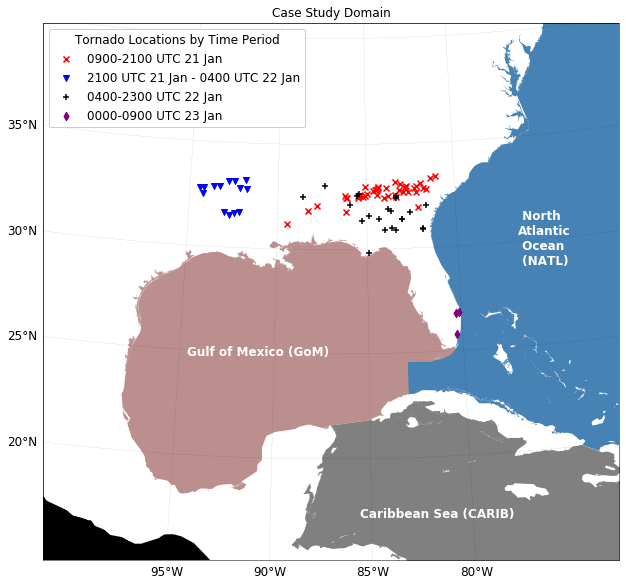

In [21]:
#########################################################################################
#########################################################################################
#########################################################################################


fig = plt.figure(figsize=(8,8))

ax = fig.add_axes([0.,0.,1.,1.])

bm.drawmapboundary(linewidth=0.5, fill_color='none', zorder=4)
bm.fillcontinents(color='w', lake_color='w', zorder=3)
#bm.drawcoastlines(linewidth=0.45, zorder=4)
#bm.drawcountries(linewidth=0.45, zorder=4)
#bm.drawstates(linewidth=0.45, zorder=4)

bm.drawmeridians(np.arange(int(-95),int(-79),5), labels=[0,0,0,1], linewidth=0.1, fontsize=12, zorder=20)
bm.drawparallels(np.arange(int(20),int(50),5), labels=[1,0,0,0], linewidth=0.1, fontsize=12, zorder=20)

ax.add_collection(PatchCollection(patches_1, facecolor= 'rosybrown', edgecolor='rosybrown', linewidths=0.1, zorder=3))
ax.add_collection(PatchCollection(patches_2, facecolor= 'grey', edgecolor='grey', linewidths=0.1, zorder=2))
ax.add_collection(PatchCollection(patches_3, facecolor= 'steelblue', edgecolor='steelblue', linewidths=0.1, zorder=2))
ax.add_collection(PatchCollection(patches_4, facecolor= 'k', edgecolor='k', linewidths=0.1, zorder=2))

ax.set_title('Case Study Domain', fontsize=12)

ax.text(0.825, 0.55, u' North\nAtlantic\n Ocean\n (NATL)', fontsize=12, alpha=1, color='w', fontweight='bold', zorder=6, transform=ax.transAxes)

ax.text(0.25, 0.38, u'Gulf of Mexico (GoM)', fontsize=12, alpha=1, color='w', fontweight='bold', zorder=6, transform=ax.transAxes)

ax.text(0.55, 0.08, u'Caribbean Sea (CARIB)', fontsize=12, alpha=1, color='w', fontweight='bold', zorder=6, transform=ax.transAxes) 

for y, x in zip(Tors1['slat'].values, Tors1['slon'].values):
    xm, ym = bm(x, y)
    t1 = ax.scatter(xm, ym, c='red', marker='x', zorder=100)
    
for y, x in zip(Tors2['slat'].values, Tors2['slon'].values):
    xm, ym = bm(x, y)
    t2 = ax.scatter(xm, ym, c='b', marker="v", zorder=100)
    
for y, x in zip(Tors3['slat'].values, Tors3['slon'].values):
    xm, ym = bm(x, y)
    t3 = ax.scatter(xm, ym, c='k', marker='+', zorder=100)
    
for y, x in zip(Tors4['slat'].values, Tors4['slon'].values):
    xm, ym = bm(x, y)
    t4 = ax.scatter(xm, ym, c='purple', marker='d', zorder=100)

    
leg = ax.legend([t1,t2,t3,t4],
          [u"0900-2100 UTC 21 Jan",
           u"2100 UTC 21 Jan - 0400 UTC 22 Jan",
           u"0400-2300 UTC 22 Jan",
           u"0000-0900 UTC 23 Jan"],
          loc="upper left", title="Tornado Locations by Time Period", title_fontsize=12,
          fancybox=True, framealpha=1., fontsize=12)

leg.set_zorder(102)

#########################################################################################
#########################################################################################
#########################################################################################



#plt.savefig('/glade/work/molina/DATA/temp_figs/mwr2019_fig1.png', bbox_inches='tight', dpi=1200)
plt.show()
plt.close()


#########################################################################################
#########################################################################################
#########################################################################################